In [53]:
# Тема “Обучение без учителя”

# import lib

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

my_font = {
    "fontsize": 12,
    "color": "#FF8080",
    "family": "serif",
}

In [3]:
# Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов 
# данных библиотеки sklearn.
# Создайте датафреймы X и y из этих данных.

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [17]:
# Масштабируйте данные с помощью StandardScaler.

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(X_train_scaled.head())
print(X_test_scaled.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.287702 -0.500320  1.033237 -0.278089  0.489252 -1.428069  1.028015   
1 -0.336384 -0.500320 -0.413160 -0.278089 -0.157233 -0.680087 -0.431199   
2 -0.403253  1.013271 -0.715218 -0.278089 -1.008723 -0.402063 -1.618599   
3  0.388230 -0.500320  1.033237 -0.278089  0.489252 -0.300450  0.591681   
4 -0.325282 -0.500320 -0.413160 -0.278089 -0.157233 -0.831094  0.033747   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.802173  1.706891  1.578434  0.845343 -0.074337  1.753505  
1  0.324349 -0.624360 -0.584648  1.204741  0.430184 -0.561474  
2  1.330697 -0.974048 -0.602724 -0.637176  0.065297 -0.651595  
3 -0.839240  1.706891  1.578434  0.845343 -3.868193  1.525387  
4 -0.005494 -0.624360 -0.584648  1.204741  0.379119 -0.165787  
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.396809 -0.500320 -1.007111 -0.278089 -0.395412  0.141282  0.555916   
1 -0.400796  1.

In [18]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


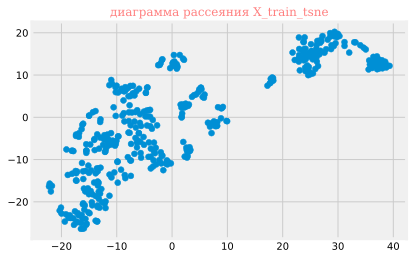

In [54]:
# Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('диаграмма рассеяния X_train_tsne', fontdict = my_font)

plt.show()

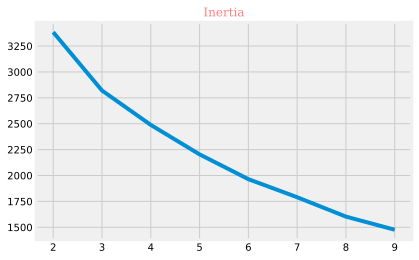

In [55]:
# Дополнительно решила оценить оптимальное количество кластеров, получилось 2 
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(X_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)

plt.title('Inertia', fontdict = my_font)

plt.show()

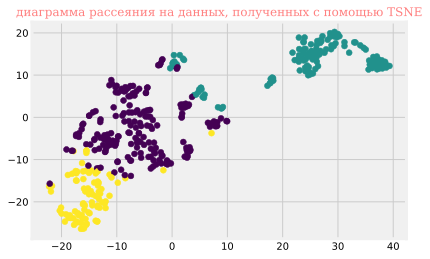

In [56]:
# Задание 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.

kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title('диаграмма рассеяния на данных, полученных с помощью TSNE', fontdict = my_font)

plt.show()

In [31]:
# Вычислите средние значения price и CRIM в разных кластерах.

print('Кластер 0 price: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1 price: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2 price: {}'.format(y_train[labels_train == 2].mean()))

print('====')

print('Кластер 0 CRIM: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1 CRIM: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2 CRIM: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0 price: 24.958115183246072
Кластер 1 price: 16.165354330708663
Кластер 2 price: 27.78837209302326
====
Кластер 0 CRIM: 0.42166020942408367
Кластер 1 CRIM: 10.797028425196853
Кластер 2 CRIM: 0.07356558139534886


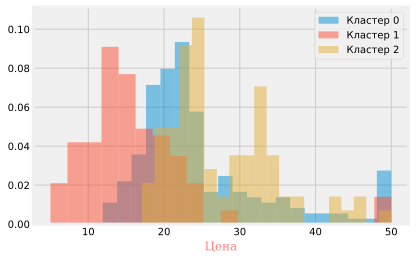

In [57]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена', fontdict = my_font)

plt.show()

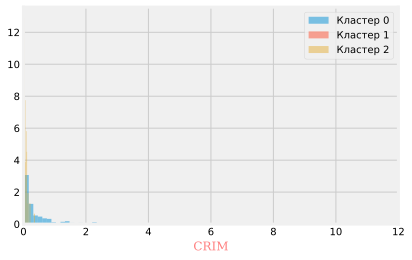

In [58]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM', fontdict = my_font)

plt.show()

In [43]:
# *Задание 3
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.

# kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

labels_train_1 = kmeans.fit_predict(X_train)
print(labels_train_1)


[2 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 2 0 0 2 0 0 1 2 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0
 0 0 0 0 0 2 2 2 0 0 1 0 2 0 2 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 2 2 2 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 2 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 0 0 0 2 0 0
 1 0 0 2 2 2 0 0 2 1 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 2 2 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 2 2 0 0 0 1 0 0 2 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0 0 0 0 2 0 0 2 0 0 0 1 0 2 2 2 0
 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 0 1 0 0 0 1 0 1
 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 2 0 1 0 0 2 0 0 0 0 0 0 0
 0 0 2 0 0 2 0 2 0 1 0 0 0 0 0 0 2 0 2 0 2 0 0 1 0 0 0 0 0 0 0 0 1 1]


In [44]:
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

print('Кластер 0 price: {}'.format(y_train[labels_train_1 == 0].mean()))
print('Кластер 1 price: {}'.format(y_train[labels_train_1 == 1].mean()))
print('Кластер 2 price: {}'.format(y_train[labels_train_1 == 2].mean()))

print('====')

print('Кластер 0 CRIM: {}'.format(X_train.loc[labels_train_1 == 0, 'CRIM'].mean()))
print('Кластер 1 CRIM: {}'.format(X_train.loc[labels_train_1 == 1, 'CRIM'].mean()))
print('Кластер 2 CRIM: {}'.format(X_train.loc[labels_train_1 == 2, 'CRIM'].mean()))

Кластер 0 price: 25.16868686868687
Кластер 1 price: 13.196774193548388
Кластер 2 price: 17.442105263157895
====
Кластер 0 CRIM: 0.40486282828282844
Кластер 1 CRIM: 14.360380322580648
Кластер 2 CRIM: 11.745661842105266


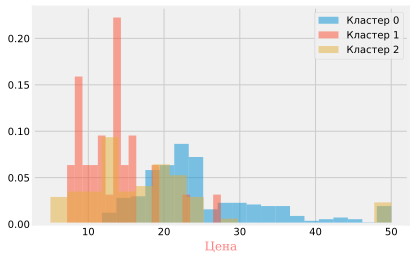

In [59]:
plt.hist(y_train[labels_train_1 == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train_1 == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train_1 == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена', fontdict = my_font)

plt.show()

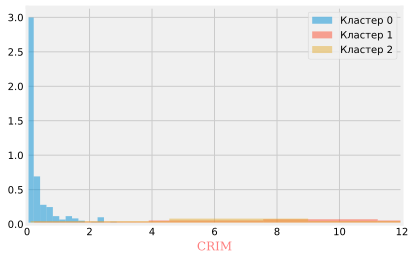

In [60]:
plt.hist(X_train.loc[labels_train_1 == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train_1 == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train_1 == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM', fontdict = my_font)

plt.show()